In [92]:
#supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')
                        
  #import the numpy and pandas packages
import numpy as np
import pandas as pd 

#to read the dataset
#saving it into a dataframe called x_edu
x_edu = pd.read_csv(r"C:\Users\aminu\OneDrive\Documents\Leads.csv")
x_edu.shape

(9240, 37)

In [93]:
#inspect the different columns in the dataset
x_edu.columns


Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [94]:
x_edu.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [95]:
#check the info to see the types of feature variables and the null values present
x_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [96]:
#there are categorical variables and a lot of null values present which need to be treated accordingly.
#check the number of missing values in each column
x_edu.isnull().sum().sort_values(ascending = False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [97]:
#we are dropping the columns which have null values greater than 3000

for col in x_edu.columns:
    if x_edu[col].isnull().sum()>3000:
        x_edu.drop(col, axis = 1, inplace = True)



In [98]:
#checking the no of null values again

x_edu.isnull().sum().sort_values(ascending = False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [99]:
#for our analysis we dont need the city and country columns so we are dropping them

x_edu.drop(["City", "Country"], axis = 1, inplace= True ) 


In [100]:
#calculating the percentage of missing values in each column

round(100*(x_edu.isnull().sum()/len(x_edu.index)),2).sort_values(ascending = False)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
How did you hear about X Education               23.89
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
X Education Forums                                0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Prospect I

In [101]:
#check the no of null values again
x_edu.isnull().sum().sort_values(ascending = False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

In [102]:
#there are certain columns which have entries as select because the customer 
#hadn't chosen any option. Identifying them as follows:

for column in x_edu.columns:
    print(x_edu[column].astype('category').value_counts())
    print("********************************")



Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
********************************
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
********************************
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
********************************
Lead 

In [103]:
# Specialization, How did you hear about X Education, Lead Profile
#these have level "select"

x_edu["Specialization"].value_counts()






Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [104]:
x_edu["How did you hear about X Education"].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [105]:

x_edu["Lead Profile"].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [106]:
# we will drop columns Lead Profile and "How did you hear about X Education" as they are not very useful and they have a lot
#of "select" values

x_edu.drop(["Lead Profile", "How did you hear about X Education"], axis = 1 , inplace = True)



In [107]:
# since the columns Get updates on DM Content, Update me on Supply Chain Content, 
#Receive More Updates About Our Courses, Through Recommendations, Digital Advertisement, 
#Newspaper, X Education Forums, Newspaper Article, Magazine, Search, Do Not Call, 
#I agree to pay the amount through cheque, What matters most to you in choosing a course 
#all have similar kind of responses we can drop them as 
#there is no significance to the responses in these columns.

x_edu.drop(["Get updates on DM Content", "Update me on Supply Chain Content", "Receive More Updates About Our Courses", 
            "Through Recommendations", "Digital Advertisement", "Newspaper", "X Education Forums",
            "Newspaper Article", "Magazine", "Search", "Do Not Call", "I agree to pay the amount through cheque", 
            "What matters most to you in choosing a course", "A free copy of Mastering The Interview"], axis = 1,
          inplace = True)



In [108]:
x_edu.isnull().sum().sort_values(ascending = False)

What is your current occupation    2690
Specialization                     1438
TotalVisits                         137
Page Views Per Visit                137
Last Activity                       103
Lead Source                          36
Prospect ID                           0
Lead Number                           0
Lead Origin                           0
Do Not Email                          0
Converted                             0
Total Time Spent on Website           0
Last Notable Activity                 0
dtype: int64

In [109]:
#dropping the null values in all the column which have null values



In [110]:
x_edu = x_edu[~(pd.isnull(x_edu["What is your current occupation"]))]

In [111]:
x_edu = x_edu[~(pd.isnull(x_edu["Specialization"]))]

In [112]:
x_edu = x_edu[~(pd.isnull(x_edu["TotalVisits"]))]

In [113]:
x_edu = x_edu[~(pd.isnull(x_edu["Page Views Per Visit"]))]

In [114]:
x_edu = x_edu[~(pd.isnull(x_edu["Last Activity"] ))]

In [115]:
x_edu = x_edu[~(pd.isnull(x_edu["Lead Source"] ))]

In [116]:
x_edu.isnull().sum().sort_values(ascending = False)

Prospect ID                        0
Lead Number                        0
Lead Origin                        0
Lead Source                        0
Do Not Email                       0
Converted                          0
TotalVisits                        0
Total Time Spent on Website        0
Page Views Per Visit               0
Last Activity                      0
Specialization                     0
What is your current occupation    0
Last Notable Activity              0
dtype: int64

In [117]:
print(100*len(x_edu.index)/9240) #amount of retained data

68.97186147186147


In [118]:
x_edu.head() #Prospect ID and Lead number wont have any bearing to the analysis, so we will remove them

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Modified


In [119]:
x_edu.drop(["Prospect ID", "Lead Number"], axis = 1, inplace= True ) 


In [120]:
x_edu.head()


,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Modified


In [121]:
#identifying the categorical variables for conversion to dummy variables
#Lead Origin, Lead Source, Do Not Email, Last Activity, 
#What is your current occupation, Last Notable Activity are categorical variables

In [122]:
#creating dummy variables 

dummy = pd.get_dummies(x_edu[["Lead Origin", "Lead Source", "Do Not Email", "Last Activity", 
"What is your current occupation", "Last Notable Activity"]], )

x_edu = pd.concat([x_edu, dummy], axis = 1)

In [123]:
#Creating dummy variable for the column Specialization

dummy1 = pd.get_dummies(x_edu["Specialization"], prefix = "Specialization")
dummy1 = dummy1.drop(["Specialization_Select"], axis = 1)

In [124]:
x_edu = pd.concat([x_edu, dummy1], axis = 1)

In [125]:
#dropping columns for whcih dummy variables has been created

x_edu = x_edu.drop(["Lead Origin", "Lead Source", "Do Not Email", "Last Activity", 
"What is your current occupation", "Last Notable Activity", "Specialization"], axis = 1)

In [126]:
x_edu.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,5.0,674,2.5,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.0,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.0,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,1,2.0,1428,1.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [127]:
#Test-train split

from sklearn.model_selection import train_test_split

In [128]:
df_train, df_test = train_test_split(x_edu, train_size = 0.7, test_size = 0.3, random_state =100)

In [129]:
# Rescaling the features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#Apply scaler to all the numeric columns

num_vars = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0,0.015936,0.029489,0.125,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
218,0,0.015936,0.082306,0.250,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4171,1,0.023904,0.034331,0.375,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4037,1,0.000000,0.000000,0.000,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3660,1,0.000000,0.000000,0.000,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [130]:
#Dividing into X and Y sets for the model building

y_train = df_train.pop("Converted")
X_train = df_train

In [131]:
#Building our logistic regression model using RFE

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()



In [132]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator = logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [133]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('Lead Origin_API', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 45),
 ('Lead Source_Click2call', False, 11),
 ('Lead Source_Direct Traffic', False, 26),
 ('Lead Source_Facebook', False, 37),
 ('Lead Source_Google', False, 47),
 ('Lead Source_Live Chat', False, 51),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 46),
 ('Lead Source_Pay per Click Ads', False, 49),
 ('Lead Source_Press_Release', False, 58),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', False, 48),
 ('Lead Source_Social Media', False, 63),
 ('Lead Source_WeLearn', False, 38),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 36),
 ('Lead Source_testone', False, 44),
 ('Do Not Email_No', False, 9),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_A

In [134]:
col_rfe = X_train.columns[rfe.support_]

In [135]:
#selecting only the columns selected by RFE

X_train = X_train[col_rfe]

In [136]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
8003,0.015936,0.029489,True,False,False,False,False,False,True,False,False,True,False,False,False
218,0.015936,0.082306,True,False,False,False,False,False,False,False,False,True,False,False,False
4171,0.023904,0.034331,True,False,False,False,False,False,False,False,False,True,False,False,False
4037,0.000000,0.000000,False,False,True,False,False,False,False,False,False,True,False,False,False
3660,0.000000,0.000000,False,True,False,False,False,False,True,False,False,True,False,False,False


In [137]:
#creating a logistic regression model using stasmodels

import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train.astype(float), X_train_sm.astype(float), family = sm.families.Binomial())
result = logm.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2068.8
Date:                Fri, 20 Sep 2024   Deviance:                       4137.6
Time:                        07:16:15   Pearson chi2:                 4.81e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3671
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8365      0.597     -1.402      0.161      -2.006       0.333
TotalVisits                                             12.1190      2.739      4.425      0.000       6.751      17.487
Total Time Spent on Website                              4.4380      0.185     23.931      0.000       4.075       4.802
Lead Origin_Landing Page Submission                     -0.2917      0.098     -2.987      0.003      -0.483      -0.100
Lead Origin_Lead Add Form                                4.0120      0.266     15.057      0.000       3.490       4.534
Lead Source_Olark Chat                                   1.2617      0.138      9.146      0.000       0.991       1.532
Lead Source_Welingak Website                             2.1533      1.037      2.077      0.038       0.121       4.185
Do Not Email_Yes                                        -1.4817      0.195     -7.618      0.000      -1.863      -1.100
Last Activity_Had a Phone Conversation                   0.9597      0.981      0.978      0.328      -0.964       2.883
Last Activity_SMS Sent                                   1.1965      0.083     14.473      0.000       1.034       1.359
What is your current occupation_Housewife               22.7379   2.43e+04      0.001      0.999   -4.76e+04    4.77e+04
What is your current occupation_Student                 -1.1186      0.625     -1.790      0.073      -2.343       0.106
What is your current occupation_Unemployed              -1.3197      0.588     -2.243      0.025      -2.473      -0.167
What is your current occupation_Working Professional     1.3069      0.618      2.116      0.034       0.096       2.517
Last Notable Activity_Had a Phone Conversation          23.2927   2.07e+04      0.001      0.999   -4.06e+04    4.07e+04
Last Notable Activity_Unreachable                        2.7780      0.807      3.443      0.001       1.197       4.359
========================================================================================================================
"""

In [138]:
#Some variables have p value>0.05
#Checking the VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor((X_train.astype(float)).values,i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
11,What is your current occupation_Unemployed,6.37
2,Lead Origin_Landing Page Submission,3.80
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
3,Lead Origin_Lead Add Form,2.03
4,Lead Source_Olark Chat,1.90
12,What is your current occupation_Working Profes...,1.90
0,TotalVisits,1.63
8,Last Activity_SMS Sent,1.60


In [139]:
#VIF seems to be reasonable except for what is your current occupation_Unemployed

#Lets drop the variable "Last Notable Activity_Unreachable" as it has high p value

X_train.drop("Last Notable Activity_Unreachable", axis = 1, inplace = True )

In [140]:
#refit the model
X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train.astype(float), X_train_sm.astype(float), family = sm.families.Binomial())
result = logm.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2077.1
Date:                Fri, 20 Sep 2024   Deviance:                       4154.1
Time:                        07:16:16   Pearson chi2:                 4.82e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3648
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7997      0.591     -1.353      0.176      -1.958       0.358
TotalVisits                                             12.0507      2.732      4.411      0.000       6.696      17.405
Total Time Spent on Website                              4.4182      0.185     23.900      0.000       4.056       4.780
Lead Origin_Landing Page Submission                     -0.2920      0.097     -2.998      0.003      -0.483      -0.101
Lead Origin_Lead Add Form                                4.0023      0.266     15.039      0.000       3.481       4.524
Lead Source_Olark Chat                                   1.2483      0.138      9.076      0.000       0.979       1.518
Lead Source_Welingak Website                             2.1468      1.037      2.071      0.038       0.115       4.179
Do Not Email_Yes                                        -1.4890      0.194     -7.666      0.000      -1.870      -1.108
Last Activity_Had a Phone Conversation                   0.9438      0.981      0.963      0.336      -0.978       2.866
Last Activity_SMS Sent                                   1.1814      0.082     14.327      0.000       1.020       1.343
What is your current occupation_Housewife               22.7060   2.43e+04      0.001      0.999   -4.76e+04    4.77e+04
What is your current occupation_Student                 -1.1433      0.620     -1.845      0.065      -2.358       0.071
What is your current occupation_Unemployed              -1.3326      0.583     -2.287      0.022      -2.475      -0.190
What is your current occupation_Working Professional     1.2934      0.612      2.112      0.035       0.093       2.493
Last Notable Activity_Had a Phone Conversation          23.2893   2.07e+04      0.001      0.999   -4.06e+04    4.07e+04
========================================================================================================================
"""

In [141]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor((X_train.astype(float)).values,i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,6.36
2,Lead Origin_Landing Page Submission,3.80
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
3,Lead Origin_Lead Add Form,2.03
4,Lead Source_Olark Chat,1.90
12,What is your current occupation_Working Profes...,1.90
0,TotalVisits,1.63
8,Last Activity_SMS Sent,1.59


In [142]:
#dropping the column 'What is your current occupation_Housewife" as it has high p value
X_train.drop("What is your current occupation_Housewife", axis = 1, inplace = True)

In [143]:
#refit the model
X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train.astype(float), X_train_sm.astype(float), family = sm.families.Binomial())
result = logm.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.4
Date:                Fri, 20 Sep 2024   Deviance:                       4158.8
Time:                        07:16:16   Pearson chi2:                 4.82e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3641
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2459      0.552     -0.445      0.656      -1.328       0.836
TotalVisits                                             11.8312      2.716      4.356      0.000       6.507      17.155
Total Time Spent on Website                              4.4151      0.185     23.894      0.000       4.053       4.777
Lead Origin_Landing Page Submission                     -0.2868      0.097     -2.946      0.003      -0.478      -0.096
Lead Origin_Lead Add Form                                4.0028      0.266     15.045      0.000       3.481       4.524
Lead Source_Olark Chat                                   1.2463      0.137      9.064      0.000       0.977       1.516
Lead Source_Welingak Website                             2.1453      1.037      2.069      0.039       0.113       4.177
Do Not Email_Yes                                        -1.4921      0.194     -7.673      0.000      -1.873      -1.111
Last Activity_Had a Phone Conversation                   0.9454      0.980      0.964      0.335      -0.976       2.867
Last Activity_SMS Sent                                   1.1808      0.082     14.322      0.000       1.019       1.342
What is your current occupation_Student                 -1.6958      0.584     -2.905      0.004      -2.840      -0.552
What is your current occupation_Unemployed              -1.8846      0.545     -3.460      0.001      -2.952      -0.817
What is your current occupation_Working Professional     0.7407      0.576      1.286      0.198      -0.388       1.870
Last Notable Activity_Had a Phone Conversation          22.2889   1.26e+04      0.002      0.999   -2.46e+04    2.47e+04
========================================================================================================================
"""

In [144]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor((X_train.astype(float)).values,i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,6.30
2,Lead Origin_Landing Page Submission,3.77
7,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.37
3,Lead Origin_Lead Add Form,2.01
4,Lead Source_Olark Chat,1.89
11,What is your current occupation_Working Profes...,1.89
0,TotalVisits,1.63
8,Last Activity_SMS Sent,1.59


In [145]:
#dropping the column "Last Notable Activity_Had a Phone Conversation" as it has high p value
X_train.drop("Last Notable Activity_Had a Phone Conversation", axis = 1, inplace = True)


In [146]:
#refit the model
X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train.astype(float), X_train_sm.astype(float), family = sm.families.Binomial())
result = logm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2082.4
Date:                Fri, 20 Sep 2024   Deviance:                       4164.8
Time:                        07:16:16   Pearson chi2:                 4.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3632
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2498      0.552     -0.452      0.651      -1.332       0.832
TotalVisits                                             11.9321      2.719      4.388      0.000       6.602      17.262
Total Time Spent on Website                              4.4074      0.185     23.870      0.000       4.045       4.769
Lead Origin_Landing Page Submission                     -0.2820      0.097     -2.898      0.004      -0.473      -0.091
Lead Origin_Lead Add Form                                4.0058      0.266     15.056      0.000       3.484       4.527
Lead Source_Olark Chat                                   1.2493      0.138      9.086      0.000       0.980       1.519
Lead Source_Welingak Website                             2.1452      1.037      2.069      0.039       0.113       4.177
Do Not Email_Yes                                        -1.4925      0.194     -7.677      0.000      -1.873      -1.111
Last Activity_Had a Phone Conversation                   2.7235      0.803      3.393      0.001       1.150       4.297
Last Activity_SMS Sent                                   1.1804      0.082     14.323      0.000       1.019       1.342
What is your current occupation_Student                 -1.6948      0.584     -2.904      0.004      -2.839      -0.551
What is your current occupation_Unemployed              -1.8834      0.545     -3.459      0.001      -2.951      -0.816
What is your current occupation_Working Professional     0.7390      0.576      1.283      0.199      -0.390       1.868
========================================================================================================================
"""

In [147]:



from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor((X_train.astype(float)).values,i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,6.30
2,Lead Origin_Landing Page Submission,3.77
1,Total Time Spent on Website,2.37
3,Lead Origin_Lead Add Form,2.01
4,Lead Source_Olark Chat,1.89
11,What is your current occupation_Working Profes...,1.89
0,TotalVisits,1.63
8,Last Activity_SMS Sent,1.59
5,Lead Source_Welingak Website,1.32
9,What is your current occupation_Student,1.19


In [148]:
#dropping "What is your current occupation_Working Professional"
X_train.drop("What is your current occupation_Working Professional" , axis = 1, inplace = True)


In [149]:
#refit the model
X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train.astype(float), X_train_sm.astype(float), family = sm.families.Binomial())
result = logm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2083.2
Date:                Fri, 20 Sep 2024   Deviance:                       4166.3
Time:                        07:16:16   Pearson chi2:                 4.79e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3630
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.4189      0.206      2.030      0.042       0.014       0.823
TotalVisits                                   11.8169      2.713      4.356      0.000       6.500      17.134
Total Time Spent on Website                    4.4073      0.185     23.867      0.000       4.045       4.769
Lead Origin_Landing Page Submission           -0.2807      0.097     -2.885      0.004      -0.471      -0.090
Lead Origin_Lead Add Form                      4.0059      0.266     15.059      0.000       3.485       4.527
Lead Source_Olark Chat                         1.2495      0.137      9.090      0.000       0.980       1.519
Lead Source_Welingak Website                   2.1436      1.037      2.068      0.039       0.112       4.176
Do Not Email_Yes                              -1.4900      0.194     -7.668      0.000      -1.871      -1.109
Last Activity_Had a Phone Conversation         2.7271      0.802      3.398      0.001       1.154       4.300
Last Activity_SMS Sent                         1.1837      0.082     14.382      0.000       1.022       1.345
What is your current occupation_Student       -2.3635      0.281     -8.417      0.000      -2.914      -1.813
What is your current occupation_Unemployed    -2.5525      0.186    -13.754      0.000      -2.916      -2.189
==============================================================================================================
"""

In [150]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor((X_train.astype(float)).values,i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,4.03
2,Lead Origin_Landing Page Submission,3.11
1,Total Time Spent on Website,2.07
0,TotalVisits,1.58
4,Lead Source_Olark Chat,1.55
3,Lead Origin_Lead Add Form,1.54
8,Last Activity_SMS Sent,1.53
5,Lead Source_Welingak Website,1.31
9,What is your current occupation_Student,1.11
6,Do Not Email_Yes,1.09


In [151]:
#Model Evaluation

#both the p values and VIF values are within limits

y_train_pred = result.predict((sm.add_constant(X_train)).astype(float))
y_train_pred[:10]

8003    0.286545
218     0.134335
4171    0.121272
4037    0.292345
3660    0.955045
207     0.230820
2044    0.210867
6411    0.959019
6498    0.072147
2085    0.982294
dtype: float64

In [152]:
#reshaping into array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28654472, 0.13433517, 0.12127186, 0.29234491, 0.95504452,
       0.2308203 , 0.21086723, 0.95901935, 0.07214666, 0.98229431])

In [153]:
#creating a dataframe with the actual probabilities and that predicted by model

y_train_pred_final = pd.DataFrame({"Converted":y_train.values, "Conversion_Probability":y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Probability
0,0,0.286545
1,0,0.134335
2,1,0.121272
3,1,0.292345
4,1,0.955045


In [154]:
#creating new column "Predicted" if predited probability > 0.5

y_train_pred_final["Predicted"] = y_train_pred_final.Conversion_Probability.map(lambda x : 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted
0,0,0.286545,0
1,0,0.134335,0
2,1,0.121272,0
3,1,0.292345,0
4,1,0.955045,1


In [155]:
#Evaluation metric

from sklearn import metrics
#print confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[1925  387]
 [ 567 1582]]


In [156]:
#Overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7861466039004708


In [157]:
#evaluating other metrics : true positive, true negative, false positives and false negatives, Also sensitivity and specificity

TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

sensitivity = TP/(TP+FN)
sensitivity

0.7361563517915309

In [158]:
specificity = TN/(TN+FP)
specificity

0.8326124567474048

In [159]:
#finding the optimal cut off, 0.5 was taken arbitarily to predict the model performance.
#To optimise the threshold, lets plot the ROC curve and find AUC

In [160]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label =  "ROC curve (area = %0.2f)" %auc_score)
    plt.plot([0,1],[0,1],"k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate or [1-True Negative Rate]")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic example")
    plt.legend(loc="lower right")
    plt.show()
    
    return None



In [161]:
#import matpltlib to plot the roc curve
import matplotlib.pyplot as plt

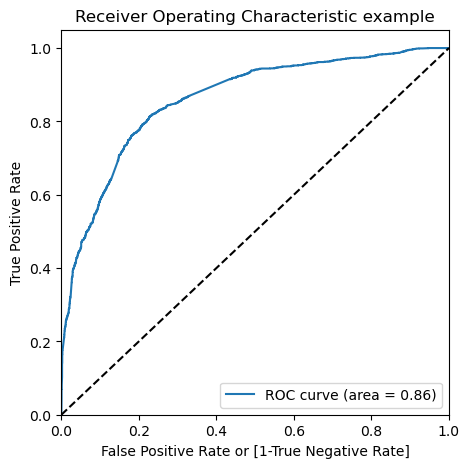

In [162]:
#call the roc function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

In [163]:
#the area under the curve is 0.86 which is pretty good.

In [164]:
#for different probability cut offs 
num = [float(x)/10 for x in range(10)]

for i in num :
    
    y_train_pred_final[i] = y_train_pred_final.Conversion_Probability.map(lambda x:1 if x>i else 0)
    
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.286545,0,1,1,1,0,0,0,0,0,0,0
1,0,0.134335,0,1,1,0,0,0,0,0,0,0,0
2,1,0.121272,0,1,1,0,0,0,0,0,0,0,0
3,1,0.292345,0,1,1,1,0,0,0,0,0,0,0
4,1,0.955045,1,1,1,1,1,1,1,1,1,1,1


In [165]:
#lets create a dataframe to see the valuess of accuracy, specificity and sensitivity at different values
#of probability cut offs

cutoffdf = pd.DataFrame(columns = ["Probability", "Accuracy", "Sensitivity", "Specificity"])

from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    Ac  = (cm1[0,0]+cm1[1,1])/total1
    Sp = (cm1[0,0]/(cm1[0,1]+cm1[0,0]))
    Se = (cm1[1,1]/(cm1[1,1]+cm1[1,0]))
    cutoffdf.loc[i] = [i,Ac, Sp, Se]
print(cutoffdf)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.481731     0.000000     1.000000
0.1          0.1  0.532168     0.101644     0.995347
0.2          0.2  0.697601     0.468426     0.944160
0.3          0.3  0.768213     0.678201     0.865054
0.4          0.4  0.790854     0.775519     0.807352
0.5          0.5  0.786147     0.832612     0.736156
0.6          0.6  0.757453     0.882353     0.623081
0.7          0.7  0.736606     0.914792     0.544905
0.8          0.8  0.710155     0.950692     0.451373
0.9          0.9  0.643354     0.981401     0.279665


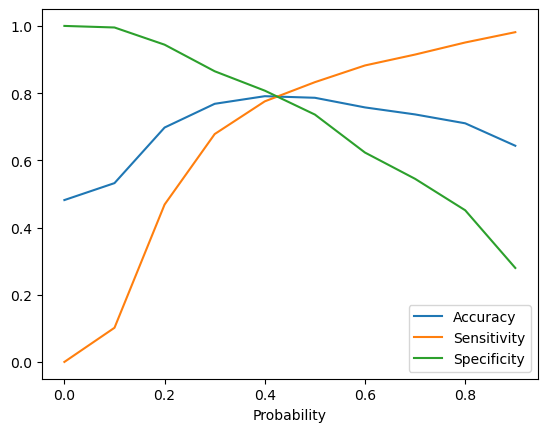

In [166]:
#plotting it we can see the value of the optimum cut off as 0.42

cutoffdf.plot.line(x= "Probability", y = ["Accuracy","Sensitivity","Specificity"])
plt.show()

In [167]:
#Choosing 0.42 as the optimum cut off

y_train_pred_final["final_predicted"] = y_train_pred_final.Conversion_Probability.map(lambda x : 1 if x>0.42 else 0)
y_train_pred_final

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.286545,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.134335,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.121272,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.292345,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.955045,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4456,1,0.955045,1,1,1,1,1,1,1,1,1,1,1,1
4457,0,0.796367,1,1,1,1,1,1,1,1,1,0,0,1
4458,0,0.902549,1,1,1,1,1,1,1,1,1,1,1,1
4459,0,0.197581,0,1,1,0,0,0,0,0,0,0,0,0


In [168]:
#checking accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.7910782335799148

In [169]:
#Creating the confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion)


[[1829  483]
 [ 449 1700]]


In [170]:
#Evaluating other metrics

TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]


In [171]:
#Sensitivity


TP/(TP+FN)

0.7910656119125175

In [172]:
#Specificity

TN/(TN+FP)

0.7910899653979239

In [173]:
#Making predictions on the test set

#Scale the test set using the transform

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,1,0.000000,0.000000,0.0000,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
6122,0,0.027888,0.029049,0.4375,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9202,0,0.015936,0.416813,0.2500,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6570,1,0.011952,0.378961,0.1875,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2668,1,0.031873,0.395246,0.2500,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [174]:
#Dividing into X and Y sets for the model building

y_test = df_test.pop("Converted")
X_test = df_test

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,0.000000,0.000000,0.0000,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
6122,0.027888,0.029049,0.4375,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
9202,0.015936,0.416813,0.2500,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6570,0.011952,0.378961,0.1875,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2668,0.031873,0.395246,0.2500,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [175]:

X_test = X_test[col_rfe]

In [176]:
X_test.shape

(1912, 15)

In [177]:
#Add a constant to X_test

X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,False,True,False,False,False,False,True,False,False,False,True,False,False
6122,1.0,0.027888,0.029049,True,False,False,False,False,False,False,False,False,True,False,False,False
9202,1.0,0.015936,0.416813,True,False,False,False,False,False,True,False,False,True,False,False,False
6570,1.0,0.011952,0.378961,True,False,False,False,True,False,True,False,False,True,False,False,False
2668,1.0,0.031873,0.395246,True,False,False,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,True,False,False,False,False,False,True,False,False,True,False,False,False
6583,1.0,0.011952,0.152289,True,False,False,False,False,False,True,False,False,True,False,False,False
5531,1.0,0.055777,0.702025,True,False,False,False,False,False,False,False,False,True,False,False,False
3056,1.0,0.011952,0.417694,False,False,False,False,True,False,True,False,False,True,False,False,False


In [178]:
#Dropping the columns : Last Notable Activity_Unreachable, Last Notable Activity_Had a Phone Conversation, 
#What is your current occupation_Working Professional, What is your current occupation_Housewife

X_test.drop(["Last Notable Activity_Unreachable", "Last Notable Activity_Had a Phone Conversation",
            "What is your current occupation_Working Professional", "What is your current occupation_Housewife"], 
            axis =1, inplace = True)



In [179]:
X_test.shape

(1912, 11)

In [181]:
#making predictions on the test set 
X_test_sm = sm.add_constant(X_test)

y_test_pred = result.predict(X_test_sm.astype(float))

In [89]:
X_test.shape

(1912, 75)

In [90]:
X_train.shape

(4461, 11)

In [182]:
y_test_pred[:10]

4771    0.996347
6122    0.123831
9202    0.688864
6570    0.287189
2668    0.708494
4233    0.796113
3368    0.744256
9091    0.450632
5972    0.268830
3631    0.774471
dtype: float64

In [183]:
#converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [184]:
y_pred_1.head()

,0
4771,0.996347
6122,0.123831
9202,0.688864
6570,0.287189
2668,0.708494


In [188]:
#COnverting y_test to a dataframe

y_test_df = pd.DataFrame(y_test)

In [189]:
#removing index of y_pred_1 and y_test

y_pred_1.reset_index(drop = True, inplace = True)

y_test_df.reset_index(drop = True, inplace = True)



In [190]:
#appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1], axis = 1)

In [191]:
y_pred_final.head()

,Converted,0
0,1,0.996347
1,0,0.123831
2,0,0.688864
3,1,0.287189
4,1,0.708494


In [192]:
#rename the column
y_pred_final = y_pred_final.rename(columns = {0:"conversion_prob"})

In [193]:
y_pred_final.head()

,Converted,conversion_prob
0,1,0.996347
1,0,0.123831
2,0,0.688864
3,1,0.287189
4,1,0.708494


In [194]:
#Making predictions on the test set using 0.44 as probability cut off
y_pred_final["final_predicted"] = y_pred_final.conversion_prob.map(lambda x: 1 if x>0.44 else 0)

In [195]:
y_pred_final.head()

,Converted,conversion_prob,final_predicted
0,1,0.996347,1
1,0,0.123831,0
2,0,0.688864,1
3,1,0.287189,0
4,1,0.708494,1


In [196]:
#calculating evaluation metrics accuracy, confusion matrix, precision and recall

metrics.accuracy_score(y_pred_final["Converted"], y_pred_final.final_predicted)



0.7860878661087866

In [202]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[802, 194],
       [215, 701]], dtype=int64)

In [203]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [204]:
#calculate precision

TP/(TP+FP)

0.7832402234636872

In [205]:
#calculate recall

TP/(TP+FN)

0.7652838427947598